### 한국과 미국의 코로나 수 분석
데이터 분석의 목적 : 여행을 목적으로, 코로나 상황을 파악하려고 함

In [1]:
import pandas as pd
df = pd.read_csv('./data/covid.csv')
# 코로나 데이터 불러오기
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346487 entries, 0 to 346486
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    346487 non-null  object 
 1   continent                                   330035 non-null  object 
 2   location                                    346487 non-null  object 
 3   date                                        346487 non-null  object 
 4   total_cases                                 308672 non-null  float64
 5   new_cases                                   337028 non-null  float64
 6   new_cases_smoothed                          335769 non-null  float64
 7   total_deaths                                287169 non-null  float64
 8   new_deaths                                  337072 non-null  float64
 9   new_deaths_smoothed                         335842 non-null  float64
 

In [4]:
df.shape
# 346487행, 67열

(346487, 67)

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
346482,ZWE,Africa,Zimbabwe,2023-09-30,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346483,ZWE,Africa,Zimbabwe,2023-10-01,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346484,ZWE,Africa,Zimbabwe,2023-10-02,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346485,ZWE,Africa,Zimbabwe,2023-10-03,265753.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346486,ZWE,Africa,Zimbabwe,2023-10-04,265753.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
df = df[['iso_code', 'location', 'date', 'total_cases', 'population']]
df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-03,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,41128772.0


In [11]:
df['location'].head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: location, dtype: object

In [12]:
df['location'].unique()
# 중복되지 않는 데이터 출력!

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [24]:
# kor_df = df.loc[df.location == 'South Korea']
kor_df = df[df['location'] == 'South Korea']
# 두 방식 둘 다 동작함! ( df.location과 df[df['location']])은 동일함!
kor_df = kor_df.set_index('date')
kor_df
# 날자가 유니크하기에 index로 사용해도 됨!
kor_df.info()
kor_df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 2020-01-03 to 2023-10-04
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     1371 non-null   object 
 1   location     1371 non-null   object 
 2   total_cases  1355 non-null   float64
 3   population   1371 non-null   float64
dtypes: float64(2), object(2)
memory usage: 53.6+ KB


,iso_code,location,total_cases,population
date,,,,
2023-09-30,KOR,South Korea,34571873.0,51815808.0
2023-10-01,KOR,South Korea,34571873.0,51815808.0
2023-10-02,KOR,South Korea,34571873.0,51815808.0
2023-10-03,KOR,South Korea,34571873.0,51815808.0
2023-10-04,KOR,South Korea,34571873.0,51815808.0


In [27]:
usa_df = df[df['location'] == 'United States']
usa_df = usa_df.set_index('date')
# 유니크한 값으로 인덱스 결정!
usa_df
usa_df.tail()

,iso_code,location,total_cases,population
date,,,,
2023-09-30,USA,United States,103436829.0,338289856.0
2023-10-01,USA,United States,103436829.0,338289856.0
2023-10-02,USA,United States,103436829.0,338289856.0
2023-10-03,USA,United States,103436829.0,338289856.0
2023-10-04,USA,United States,103436829.0,338289856.0


In [28]:
# total_cases => 확진자 수
kor_cases = kor_df['total_cases']
usa_cases = usa_df['total_cases']
print(kor_cases, usa_cases)

date
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
2020-01-06           NaN
2020-01-07           NaN
                 ...    
2023-09-30    34571873.0
2023-10-01    34571873.0
2023-10-02    34571873.0
2023-10-03    34571873.0
2023-10-04    34571873.0
Name: total_cases, Length: 1371, dtype: float64 date
2020-01-03            NaN
2020-01-04            NaN
2020-01-05            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2023-09-30    103436829.0
2023-10-01    103436829.0
2023-10-02    103436829.0
2023-10-03    103436829.0
2023-10-04    103436829.0
Name: total_cases, Length: 1371, dtype: float64


In [31]:
import pandas as pd
final_df = pd.DataFrame({
    'KOR' : kor_cases,
    'USA' : usa_cases
}, index=kor_df.index)
# 서로 같은 날짜를 기준으로 그룹화
final_df

,KOR,USA
date,,
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
...,...,...
2023-09-30,34571873.0,103436829.0
2023-10-01,34571873.0,103436829.0
2023-10-02,34571873.0,103436829.0


<Axes: xlabel='date'>

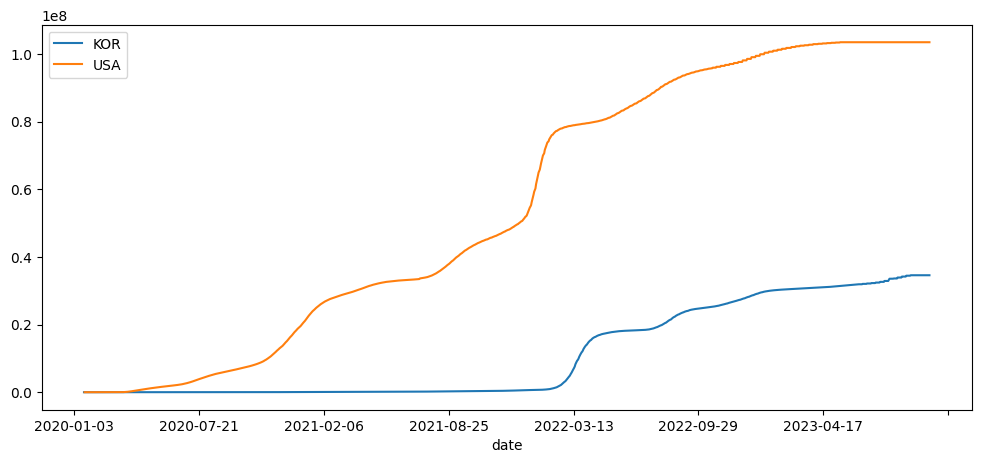

In [32]:
final_df.plot.line(figsize=(12, 5))

In [ ]:
# 미국에 비해 확진자 수가 적어보임!
# 데이터가 없어보이는 0인 부분이 있어서 변측치가 있어보임!

<Axes: xlabel='date'>

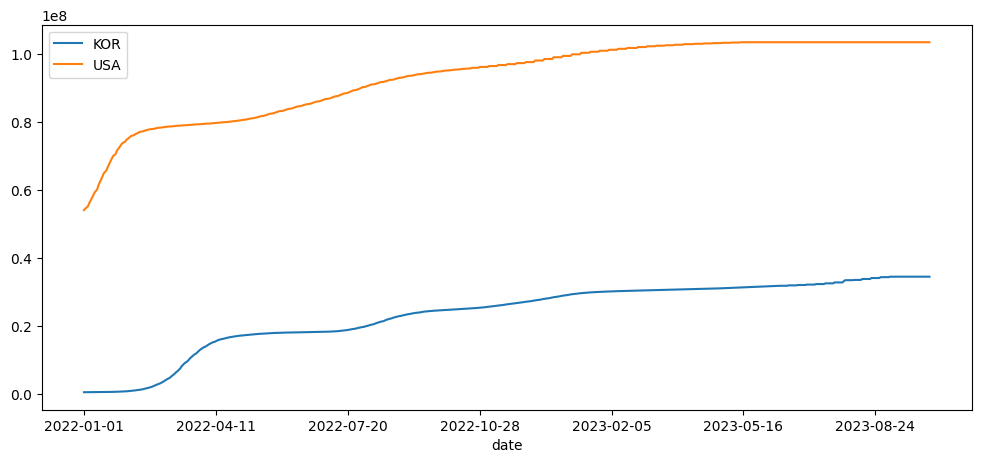

In [33]:
final_df['2022-01-01':].plot.line(figsize=(12, 5))

In [ ]:
# 완만하게 확진자 수가 증가 중
# 인구 대비가 감안되지 않아, 실제로 인구 대비 확진률이 아님!

In [40]:
# 인구 대비 확진자 수 구하기
kor_rate = kor_df['total_cases'] / kor_df['population']
usa_rate = usa_df['total_cases'] / usa_df['population']

In [41]:
final_df = pd.DataFrame({
    'KOR' : kor_rate,
    'USA' : usa_rate
}, index=kor_df.index)
# 서로 같은 날짜를 기준으로 그룹화
final_df

,KOR,USA
date,,
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
...,...,...
2023-09-30,0.667207,0.305764
2023-10-01,0.667207,0.305764
2023-10-02,0.667207,0.305764


<Axes: xlabel='date'>

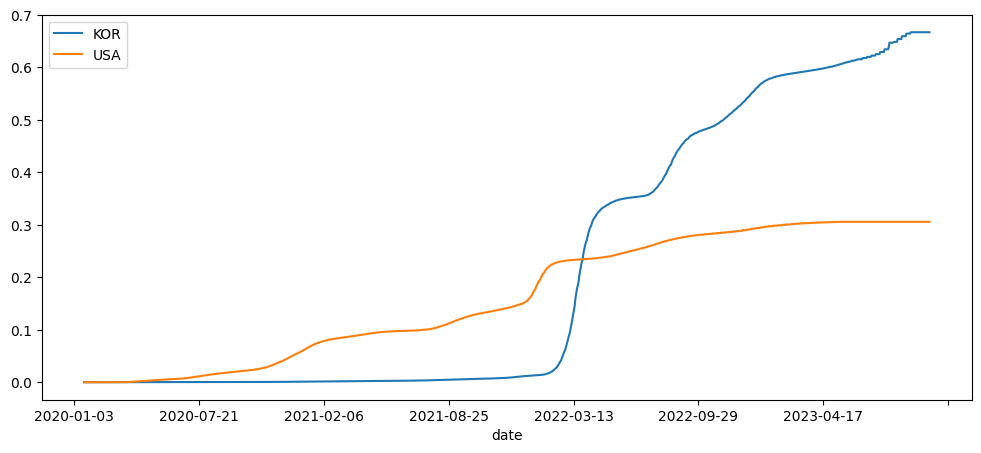

In [42]:
final_df.plot.line(figsize=(12, 5))

In [ ]:
# 어느 시점부터 한국의 확진률이 미국 확진률을 뛰어넘음!


<Axes: xlabel='date'>

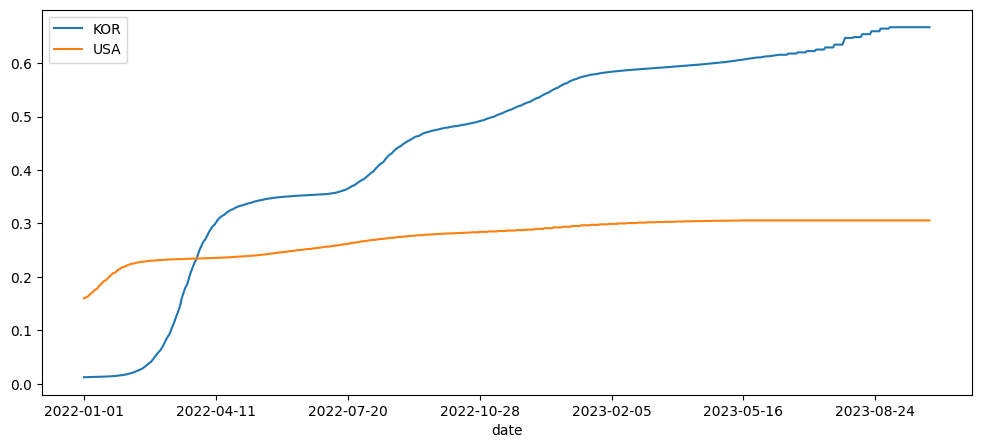

In [43]:
final_df['2022-01-01' : ].plot.line(figsize=(12, 5))

In [ ]:
# 미국의 데이터는 급격하게 증가한 후, 완만하게 데이터가 증가하는 중!
# 인구를 고려해서 그려 보면, 어떤 나라가 더 안전한지 알 수 있음!